# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import copy

data = pd.read_csv('/https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')
data.info() 
data.describe().round()
data.hist(figsize=(15, 20))
plt.show()



ImportError: Missing optional dependency 'fsspec'.  Use pip or conda to install fsspec.

Посмотрим уникальные значения по каждму столбцу:

In [2]:
for column in data.columns:
    display(column)
    display(data[column].unique())
    display()

'total_images'

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

'last_price'

array([13000000.,  3350000.,  5196000., ...,  6151120., 21400000.,
       11475000.])

'total_area'

array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

'first_day_exposition'

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

'rooms'

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

'ceiling_height'

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

'floors_total'

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

'living_area'

array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

'floor'

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

'is_apartment'

array([nan, False, True], dtype=object)

'studio'

array([False,  True])

'open_plan'

array([False,  True])

'kitchen_area'

array([ 25.  ,  11.  ,   8.3 ,    nan,  41.  ,   9.1 ,  14.4 ,  18.9 ,
         8.81,   6.5 ,   8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,
         5.6 ,  12.  ,   5.7 ,   6.1 ,  19.6 ,  15.  ,   7.  ,   9.2 ,
        11.7 ,  13.4 ,  17.  ,   6.3 ,  11.6 ,   8.8 ,  10.  ,  17.6 ,
         7.5 ,   9.5 ,  50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,
        16.  ,   5.3 ,  11.5 ,   7.2 ,   6.2 ,  10.4 ,   7.1 ,   4.9 ,
         7.3 ,  11.95,  10.2 ,   6.4 ,   5.5 ,  13.  ,   8.4 ,  23.6 ,
        10.8 ,  18.3 ,   5.  ,   8.2 ,  24.  ,  23.8 ,   6.6 ,  26.85,
        15.4 ,   7.8 ,  33.8 ,   5.4 ,  12.72,  12.2 ,  19.  ,  12.4 ,
         7.9 ,  10.3 ,   9.8 ,  17.5 ,  14.7 ,  20.91,  21.3 ,  10.6 ,
        10.9 ,   9.7 ,   7.7 ,  12.5 ,  11.4 ,   8.6 ,  11.24,  14.1 ,
        15.7 ,  13.29,  14.  ,  12.9 ,  12.7 ,  16.5 ,   9.36,  21.5 ,
        35.  ,  10.5 ,   8.7 ,  19.3 ,  21.4 ,  40.  ,  49.2 ,  11.52,
         8.9 ,   9.6 ,  30.  ,  14.2 ,   8.1 ,  10.44,   4.5 ,  16.3 ,
      

'balcony'

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

'locality_name'

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

'airports_nearest'

array([18863., 12817., 21741., ..., 11751., 20151., 24665.])

'cityCenters_nearest'

array([16028., 18603., 13933., ..., 27977.,  7262.,  6263.])

'parks_around3000'

array([ 1.,  0.,  2., nan,  3.])

'parks_nearest'

array([4.820e+02,       nan, 9.000e+01, 8.400e+01, 1.120e+02, 3.100e+02,
       2.940e+02, 5.900e+02, 4.200e+02, 7.590e+02, 2.480e+02, 5.170e+02,
       4.110e+02, 4.520e+02, 5.320e+02, 4.590e+02, 7.250e+02, 4.700e+01,
       6.200e+02, 6.750e+02, 5.310e+02, 5.260e+02, 2.710e+02, 3.630e+02,
       6.480e+02, 3.820e+02, 3.340e+02, 1.670e+02, 4.450e+02, 2.310e+02,
       5.110e+02, 7.510e+02, 6.660e+02, 3.840e+02, 1.270e+02, 2.410e+02,
       4.880e+02, 1.560e+02, 5.760e+02, 2.850e+02, 6.330e+02, 1.500e+01,
       2.150e+02, 5.330e+02, 1.410e+02, 3.660e+02, 3.410e+02, 5.890e+02,
       3.440e+02, 5.080e+02, 4.170e+02, 7.620e+02, 4.410e+02, 5.590e+02,
       7.490e+02, 1.230e+02, 5.010e+02, 1.000e+01, 1.133e+03, 1.205e+03,
       5.160e+02, 8.600e+02, 2.760e+02, 9.800e+02, 4.630e+02, 5.910e+02,
       2.390e+02, 6.510e+02, 1.021e+03, 4.850e+02, 5.860e+02, 3.700e+02,
       6.880e+02, 2.750e+02, 5.460e+02, 4.660e+02, 1.390e+02, 2.510e+02,
       5.370e+02, 6.270e+02, 1.040e+02, 4.500e+02, 

'ponds_around3000'

array([ 2.,  0.,  3.,  1., nan])

'ponds_nearest'

array([ 755.,   nan,  574., ...,  959.,   40., 1134.])

'days_exposition'

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

Типы, представленные в нашем датасете 

Категориальные: locality_name.

Количественные: total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_nearest, ponds_around3000, days_exposition.

Логические: is_apartment, studio, open_plan.


Случайные пропуски:

- Значения rooms 1 или 0 при указании квартиры как студии. Возможно, продавец не указал количество комнат, т.к. определен тип квартиры студия.

- Значения False в studio при количестве комнат = 0. Относится к пропуску значения комнат, никак не связанных со студией. Продавец не указал количество комнат.

- Значения NaN в столбце kitchen_area. Возможная потеря данных. Легко восстановить имея данные об общей площади.

- Значения NaN в столце balcony. Возможная потеря данных или неуказание количество балконов в виду их отсутсвия.

- Значения NaN в столце parks_around3000 и ponds_around3000. Возможная потеря данных или неуказание количество парков или прудов в виду их отсутсвия.

- Значения NaN в locality_name, cityCenters_nearest. days_exposition, ceiling_height, floors_total. Возможные потери данных.

Неслучайные пропуски:

- Значение 0 в total_images. Возможно кто-то специально не хочет показывать квартиру ввиду ее отсутсвия или желания показать квартиру только при встрече.

- Значение времени 00:00:00 в first_day_exposition. Точное время отправки на сайт продажи не требуется, нужен только день.

- Значения NaN в is_apartment. Возможно продавцы не указали, жилая квартира для постоянного проживания или апартаменты для временного проживания.

- Значения NaN в столце parks_nearest и ponds_nearest. Здесь можно было ориентироваться на количество пустых и 0 значений в столбце parks_around3000 и ponds_around3000.

- Совпадение по количеству пропусков в parks_around3000 и ponds_around3000. Скорее всего продавцы не указали эти данные.



### Предобработка данных

Посмотрим на количество пропусков в каждом столбце с помощью цикла for:

In [3]:
print('Общее количество значений:', len(data))

for column in data.columns:
    isnull_count = data[column].isna().value_counts()
    print('Количество пропусков в', column, ': ', len(data) - isnull_count[0])

Общее количество значений: 23699
Количество пропусков в total_images :  0
Количество пропусков в last_price :  0
Количество пропусков в total_area :  0
Количество пропусков в first_day_exposition :  0
Количество пропусков в rooms :  0
Количество пропусков в ceiling_height :  9195
Количество пропусков в floors_total :  86
Количество пропусков в living_area :  1903
Количество пропусков в floor :  0
Количество пропусков в is_apartment :  20924
Количество пропусков в studio :  0
Количество пропусков в open_plan :  0
Количество пропусков в kitchen_area :  2278
Количество пропусков в balcony :  11519
Количество пропусков в locality_name :  49
Количество пропусков в airports_nearest :  5542
Количество пропусков в cityCenters_nearest :  5519
Количество пропусков в parks_around3000 :  5518
Количество пропусков в parks_nearest :  15620
Количество пропусков в ponds_around3000 :  5518
Количество пропусков в ponds_nearest :  14589
Количество пропусков в days_exposition :  3181


Для заполнения пропусков, я выбрала следующие столбцы:

1. floors_total. Необходим для категоризации данных по расположению этажа в жилом доме.
2. living_area. Ключевой фактор для создания соотношения к общей площади.
3. kitchen_area. Ключевой фактор для создания соотношения к общей площади.
4. cityCenters_nearest. Ключевой фактор для определения удаленности от центра Санкт-Петербурга.
5. locality_name. Этот столбец имеет значения для гипотез. Его можно восстановить, зная местоположение от центра.

#### Чистка датасета от нереальных значений:

- Проверим нереальные значения для столцов floor и floors_total. Если указанный этаж выше этажности дома - это мошеннические действия и удалим данные строки.

In [4]:
unreal_floor = data.query('floor > floors_total')

unreal_floor.shape[0]                            #как видно из результата, таких квартир нет

0

Проверим нереальные значения для столбцов total_area, living_area и kitchen_area. Здесь проверяем:

? Какое самое маленькое значение total_area и входит ли оно в стандарты по минимуму жилья
? Сумма значений living_area и kitchen_area не больше, чем total_area
Согласно СП 54.13330.2016 (источник: https://docs.cntd.ru/document/456054198) к квартире предъявляются требования по ее размеру в зависимости от комнат:

1 комната - минимальный размер 28 кв.м.
2 комнаты - минимальный размер 44 кв.м.
3 комнаты - минимальный размер 56 кв.м.
4 комнаты - минимальный размер 70 кв.м.
5 комнат - минимальный размер 103 кв.м.
больше 5 комнат - минимальный размер равен количеству_комнат * 20 кв.м.
И требование к минимальному размеру кухни:

1 комната - минимальный размер кухни 5 кв.м.
2 комнаты и больше - минимальный размер кухни 6 кв.м.

Начнем с размера квартиры по количеству комнат. Если количество комнат равно 0, то заменим это значение на 1.

In [5]:
data['rooms'] = data['rooms'].replace(0,1)

unreal_rooms = data[data['rooms'] == 0]

len(unreal_rooms)

0

Проверим, сколько квартир соответсвует стандарту по размеру общей площади:

In [6]:
flat_with_1_room = data[data['rooms'] == 1]
print(len(flat_with_1_room))

flat_with_2_rooms = data[data['rooms'] == 2]
print(len(flat_with_2_rooms))

flat_with_3_rooms = data[data['rooms'] == 3]
print(len(flat_with_3_rooms))

flat_with_4_rooms = data[data['rooms'] == 4]
print(len(flat_with_4_rooms))

flat_with_5_rooms = data[data['rooms'] == 5]
print(len(flat_with_5_rooms))

flat_with_lots_rooms = data[data['rooms'] > 5]
print(len(flat_with_lots_rooms))

8244
7940
5814
1180
326
195


In [7]:
good_flat_with_1_room = data.query('rooms == 1 and total_area >= 28')
print(good_flat_with_1_room.shape[0])

good_flat_with_2_rooms = data.query('rooms == 2 and total_area >= 44')
print(good_flat_with_2_rooms.shape[0])

good_flat_with_3_rooms = data.query('rooms == 3 and total_area >= 56')
print(good_flat_with_3_rooms.shape[0])

good_flat_with_4_rooms = data.query('rooms == 4 and total_area >= 70')
print(good_flat_with_4_rooms.shape[0])

good_flat_with_5_rooms = data.query('rooms == 5 and total_area >= 103')
print(good_flat_with_5_rooms.shape[0])

good_flat_with_lots_rooms = data.query('rooms > 5 and (total_area >= (rooms) * 20)')
print(good_flat_with_lots_rooms.shape[0])

7856
7099
5412
1038
284
174


In [8]:
good_flat_with_lots_rooms.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
52,20,11795000.0,136.0,2017-09-22T00:00:00,6,3.0,2.0,94.0,2,NaN,...,11.0,1.0,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN
201,5,10880000.0,123.1,2015-11-12T00:00:00,6,3.2,5.0,89.0,2,NaN,...,11.0,NaN,Санкт-Петербург,26009.0,3369.0,2.0,516.0,0.0,NaN,992.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.2,8.0,159.5,7,NaN,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
509,5,90000000.0,225.0,2016-06-26T00:00:00,6,NaN,4.0,134.0,2,NaN,...,19.5,2.0,Санкт-Петербург,32864.0,5720.0,0.0,NaN,2.0,519.0,416.0
581,20,65000000.0,365.0,2019-03-18T00:00:00,7,2.9,7.0,NaN,7,NaN,...,NaN,NaN,Санкт-Петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN


Как мы видим - не все квартиры соответствуют требованиям государства. Посмотрим, какой процент составляют такие квартиры:

In [9]:
all_flats = data.shape[0]
good_all_flats = (
    good_flat_with_1_room.shape[0] + 
    good_flat_with_2_rooms.shape[0] + 
    good_flat_with_3_rooms.shape[0] + 
    good_flat_with_4_rooms.shape[0] +
    good_flat_with_5_rooms.shape[0] +
    good_flat_with_lots_rooms.shape[0])
print(all_flats - good_all_flats, ((all_flats - good_all_flats)/all_flats) * 100)

1836 7.747162327524368


7.7% не соответствуют, удалим эти значения и создадим обновлённый датафрейм:

In [10]:
frames = [good_flat_with_1_room,good_flat_with_2_rooms, good_flat_with_3_rooms, 
          good_flat_with_4_rooms, good_flat_with_5_rooms, good_flat_with_lots_rooms]
good_data = pd.concat(frames)
good_data = good_data.sort_index()

good_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [11]:
data = good_data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21863 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21863 non-null  int64  
 1   last_price            21863 non-null  float64
 2   total_area            21863 non-null  float64
 3   first_day_exposition  21863 non-null  object 
 4   rooms                 21863 non-null  int64  
 5   ceiling_height        13483 non-null  float64
 6   floors_total          21788 non-null  float64
 7   living_area           20147 non-null  float64
 8   floor                 21863 non-null  int64  
 9   is_apartment          2594 non-null   object 
 10  studio                21863 non-null  bool   
 11  open_plan             21863 non-null  bool   
 12  kitchen_area          20026 non-null  float64
 13  balcony               11361 non-null  float64
 14  locality_name         21816 non-null  object 
 15  airports_nearest   

- Проверяем, сколько квартир соотвествует минимальному размеру кухни:

In [12]:
good_kitchen_with_1_room = data.query('rooms == 1 and kitchen_area >= 5')
print(good_kitchen_with_1_room.shape[0])

good_kitchen_with_lots_rooms = data.query('rooms > 1 and kitchen_area >= 6')
print(good_kitchen_with_lots_rooms.shape[0])

7102
12381


In [13]:
bad_kitchen = data.query('kitchen_area < 5')
print(bad_kitchen.shape[0], bad_kitchen.shape[0]/data.shape[0])  #неподходящие кухни составляют около 0,2%

bad_index = bad_kitchen.index   
print(bad_index)

data.drop(bad_index, inplace=True)                               #беспощадно удаляем
data.loc[1325:1330, :]

39 0.0017838357041577095
Int64Index([ 1327,  2684,  3356,  4777,  5415,  5514,  6200,  6908,  7436,
             7950,  8002,  8605,  9368,  9873, 11033, 11217, 12285, 12370,
            12474, 12595, 12891, 13814, 14183, 14188, 14836, 15014, 15586,
            15601, 16383, 17739, 17834, 18230, 18989, 19729, 20217, 20259,
            21020, 22075, 23498],
           dtype='int64')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1326,8,8100000.0,52.0,2017-01-29T00:00:00,2,2.7,25.0,9.0,15,NaN,...,32.0,2.0,Санкт-Петербург,35555.0,15561.0,0.0,NaN,1.0,1180.0,337.0
1329,18,6750000.0,71.0,2019-04-09T00:00:00,3,NaN,9.0,43.0,6,NaN,...,8.5,NaN,Санкт-Петербург,25195.0,14409.0,0.0,NaN,0.0,NaN,NaN
1330,8,8045000.0,69.2,2017-04-21T00:00:00,2,NaN,10.0,43.7,2,NaN,...,9.7,NaN,Санкт-Петербург,23617.0,5223.0,0.0,NaN,1.0,874.0,409.0


- Посмотрим на соотношение суммы жилых и кухонных площадей к общей площади:

In [14]:
bad_sum_area =  data.query('(kitchen_area + living_area ) > total_area ')
bad_sum_area.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,...,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,NaN,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,NaN,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
1060,10,5200000.0,50.00,2015-11-06T00:00:00,2,NaN,35.0,39.00,15,False,...,20.50,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,281.0
1155,11,7000000.0,38.00,2019-04-09T00:00:00,1,3.20,5.0,33.00,1,NaN,...,12.00,NaN,Санкт-Петербург,31501.0,3670.0,1.0,183.0,3.0,689.0,NaN
1354,14,7300000.0,54.50,2018-08-20T00:00:00,2,NaN,16.0,38.00,12,NaN,...,19.00,2.0,Санкт-Петербург,51030.0,14721.0,0.0,NaN,0.0,NaN,NaN
1854,3,6540000.0,60.20,2018-10-14T00:00:00,2,NaN,24.0,55.00,24,NaN,...,14.84,NaN,Санкт-Петербург,33606.0,14769.0,0.0,NaN,0.0,NaN,60.0
1992,5,4000000.0,37.40,2018-02-11T00:00:00,1,2.53,16.0,36.40,10,NaN,...,8.60,1.0,Санкт-Петербург,19979.0,21690.0,0.0,NaN,1.0,1052.0,74.0
3426,8,4280000.0,32.51,2019-04-16T00:00:00,1,2.80,11.0,28.85,8,NaN,...,7.89,2.0,Санкт-Петербург,14482.0,15254.0,1.0,602.0,0.0,NaN,7.0


Видим, что в нашей выборке есть квартиры,где сумма кухни и жилой площади больше общей площади(возможно, это ошибка со стороны продавца, но мы удалим эти данные)

In [15]:
print(bad_sum_area.shape[0], bad_sum_area.shape[0]/data.shape[0])

bad_index = bad_sum_area.index
print(bad_index)

data.drop(bad_index, inplace=True)
data.loc[180:190, :]

54 0.002474340175953079
Int64Index([  184,   551,   601,   696,  1060,  1155,  1354,  1854,  1992,
             3426,  3891,  4366,  5096,  6802,  7239,  7398,  7680,  8211,
             9333,  9385,  9834, 10652, 10913, 11046, 11313, 11472, 11579,
            11594, 12159, 12482, 12530, 12587, 13428, 15513, 16325, 16598,
            16911, 17110, 17151, 17492, 18455, 19344, 19535, 19908, 20034,
            20490, 21266, 21377, 21519, 21824, 21868, 21915, 21956, 23202],
           dtype='int64')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
180,11,3850000.0,31.7,2018-08-02T00:00:00,1,2.5,5.0,17.9,2,NaN,...,5.6,2.0,Санкт-Петербург,10709.0,10933.0,0.0,NaN,0.0,NaN,8.0
181,2,7900000.0,71.8,2017-08-23T00:00:00,3,3.0,5.0,38.7,1,NaN,...,12.0,NaN,Санкт-Петербург,22036.0,3301.0,0.0,NaN,1.0,585.0,NaN
182,16,3400000.0,60.0,2017-10-10T00:00:00,3,2.5,5.0,44.1,1,NaN,...,6.0,NaN,Красное Село,26090.0,29514.0,0.0,NaN,0.0,NaN,98.0
185,8,8500000.0,49.9,2018-10-20T00:00:00,1,3.0,16.0,18.9,14,NaN,...,10.6,NaN,Санкт-Петербург,12114.0,8946.0,1.0,749.0,1.0,833.0,145.0
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.8,4,NaN,...,12.0,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
187,9,4300000.0,52.3,2017-10-06T00:00:00,2,NaN,12.0,29.8,4,NaN,...,10.9,NaN,Санкт-Петербург,32794.0,13643.0,0.0,NaN,0.0,NaN,69.0
188,15,4600000.0,38.5,2019-04-16T00:00:00,1,2.5,12.0,18.5,5,NaN,...,NaN,NaN,Санкт-Петербург,49065.0,16735.0,1.0,501.0,0.0,NaN,NaN
189,0,6150000.0,62.0,2017-10-13T00:00:00,3,NaN,9.0,41.5,5,NaN,...,8.5,2.0,Санкт-Петербург,41954.0,12168.0,1.0,10.0,0.0,NaN,45.0
190,4,5200000.0,62.8,2016-06-01T00:00:00,3,NaN,9.0,39.7,2,NaN,...,9.7,0.0,Санкт-Петербург,12988.0,15579.0,0.0,NaN,2.0,898.0,233.0


- Проверим нереальные значения для столбца ceiling_height. Выявим стандартное требование к высоте потолков.

Согласно СП 54.13330.2011 минимальная высота потолков должна быть 2.5 м.

In [16]:
good_ceiling_height = data[data['ceiling_height'] >= 2.5]
not_nan_ceiling_height = data['ceiling_height'].isna().value_counts()[0]
print(not_nan_ceiling_height - len(good_ceiling_height), (not_nan_ceiling_height - len(good_ceiling_height))/data.shape[0])

55 0.0025264124942581535


55(0.2%) значений не подходит под нормы - удаляем:

In [17]:
bad_ceiling_height = data[data['ceiling_height'] < 2.5]
bad_ceiling_height.head()

bad_index = bad_ceiling_height.index
print(bad_index)

data.drop(bad_index, inplace=True)
data.loc[190:200, :]

Int64Index([  193,   552,  1078,  1582,  1677,  2572,  3633,  3703,  4212,
             5498,  5542,  5735,  5850,  5918,  5941,  6066,  7270,  7644,
             7791,  9192, 10160, 11125, 11352, 11485, 11868, 12069, 13271,
            13462, 14345, 14463, 14491, 15444, 15453, 15939, 16446, 16884,
            16934, 17408, 17601, 17794, 18900, 19098, 19907, 20085, 20520,
            20564, 21180, 21349, 21521, 22411, 22462, 22590, 22960, 23121,
            23496],
           dtype='int64')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
190,4,5200000.0,62.8,2016-06-01T00:00:00,3,NaN,9.0,39.7,2,NaN,...,9.7,0.0,Санкт-Петербург,12988.0,15579.0,0.0,NaN,2.0,898.0,233.0
192,14,3270000.0,39.4,2017-04-17T00:00:00,1,NaN,24.0,19.2,9,NaN,...,11.0,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,79.0
194,19,7700000.0,85.0,2019-02-07T00:00:00,3,2.70,10.0,50.0,1,NaN,...,11.0,NaN,Санкт-Петербург,15923.0,14719.0,0.0,NaN,1.0,212.0,50.0
195,8,5300000.0,60.0,2016-05-19T00:00:00,3,NaN,9.0,NaN,4,NaN,...,NaN,0.0,Санкт-Петербург,52072.0,17061.0,1.0,1133.0,3.0,239.0,372.0
196,7,8715960.0,57.0,2017-06-29T00:00:00,1,NaN,5.0,20.0,5,NaN,...,16.0,0.0,Санкт-Петербург,17462.0,16465.0,1.0,1205.0,2.0,97.0,119.0
197,5,1600000.0,46.0,2016-04-22T00:00:00,2,NaN,5.0,NaN,2,False,...,NaN,1.0,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,171.0
198,7,2900000.0,35.0,2015-02-04T00:00:00,1,2.70,17.0,16.1,17,False,...,8.3,2.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,586.0
199,4,3735325.0,37.4,2019-03-22T00:00:00,1,2.73,12.0,17.0,4,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,21.0
200,13,9150000.0,98.3,2018-06-30T00:00:00,3,2.84,13.0,60.3,11,NaN,...,12.5,1.0,Ломоносов,48910.0,52334.0,0.0,NaN,2.0,582.0,271.0


#### Восстановление пропусков

Пропуски в floors_total заменим, изучив этаж квартиры и популярные значения всех этажей в доме по данным.

In [18]:
print(data[data['floors_total'].isna()]['floor'].value_counts())
data['floors_total'].value_counts()

4     8
8     8
6     7
12    6
9     5
3     4
18    3
5     3
7     3
10    3
11    3
21    3
13    3
19    3
20    2
1     2
14    2
2     2
24    2
17    1
15    1
22    1
Name: floor, dtype: int64


5.0     4844
9.0     3596
16.0    1334
12.0    1300
10.0    1154
4.0     1065
25.0    1024
6.0      857
17.0     807
3.0      570
7.0      567
14.0     531
18.0     474
24.0     435
8.0      371
15.0     344
23.0     339
19.0     311
22.0     274
2.0      269
20.0     267
13.0     225
11.0     197
27.0     154
21.0     143
26.0     123
35.0      21
28.0      21
1.0       15
36.0       3
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

Дома с указанным этажом квартиры и отсутвием максимального этажа в доме скорей всего подтверждает, что продавец по умолчанию указал последний этаж в доме. Сводный анализ по количеству этажей по домам говорит о том, что все строки с пропусками встречаются в выборке по максимальной этажности здания.

Соотвественно будем считать, что указанный этаж являеятеся последним этажом в доме.

In [19]:
data['floors_total'] = data['floors_total'].fillna(0)

def fill_floors_total(row):
    if row[6] == 0:
        row[6] = row[8]
    return row

data = data.apply(fill_floors_total, axis=1)

data['floors_total'].isna().value_counts()

False    21715
Name: floors_total, dtype: int64

- Пропуски в living_area заполним, взяв за основу среднее соотношение жилой площади к общей.

In [20]:
living_area_ratio_mean = (data['living_area'] / data['total_area']).mean()
living_area_ratio_median = (data['living_area'] / data['total_area']).median()
print(living_area_ratio_mean, living_area_ratio_median, living_area_ratio_mean/living_area_ratio_median)

0.5550167163529487 0.5594938980617372 0.9919978006475157


Для сравнения полученных результатов из отношения значений в строке, берём результаты, примененные к выборке в целом.

In [21]:
living_area_mean = data['living_area'].mean()
living_area_median = data['living_area'].median()
print(living_area_mean, living_area_median, living_area_mean/living_area_median)

total_area_mean = data['total_area'].mean()
total_area_median = data['total_area'].median()
print(total_area_mean, total_area_median, total_area_mean/total_area_median)

living_area_ratio_mean_series = living_area_mean / total_area_mean
living_area_ratio_median_series = living_area_median / total_area_median
print(living_area_ratio_mean_series, living_area_ratio_median_series, living_area_ratio_mean_series/ living_area_ratio_median_series)

34.882355840016 30.4 1.1474459157899999
61.883714943587385 54.0 1.145994721177544
0.563675853523248 0.5629629629629629 1.0012663187584012


Применим процент жилой площади из переменной living_area_ratio_mean.

In [22]:
data['living_area'] = data['living_area'].fillna(0)

def fill_living_area(row):
    if row[7] == 0:
        row[7] = float(format(row[2] * living_area_ratio_mean, '.2f'))
    return row

data = data.apply(fill_living_area, axis=1)

data['living_area'].isna().value_counts()

False    21715
Name: living_area, dtype: int64

- Пропуски в is_apartment заменим на False, так как отсуствие по этому пункту говорит нам, что перед нами обычная квартира.

In [23]:
data['is_apartment'] = data['is_apartment'].fillna(False)

data['is_apartment'].isna().value_counts()

False    21715
Name: is_apartment, dtype: int64

- Для пропусков в столбце kitchen_area проанализируем соотношение:

In [24]:
kitchen_area_ratio_mean = (data['kitchen_area'] / data['total_area']).mean()
kitchen_area_ratio_median = (data['kitchen_area'] / data['total_area']).median()
print(kitchen_area_ratio_mean, kitchen_area_ratio_median, kitchen_area_ratio_mean/kitchen_area_ratio_median)

0.19024131084498055 0.17696629213483145 1.0750143914414776


Для заполнения будем использовать среднее соотношение. Если произведение общей площади на это соотношение даст значение меньше 5 кв.м. то будем использовать константу в 5 кв.м.

In [25]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)

def fill_kitchen_area(row):
    if row[12] == 0:
        normal_fill_kitchen = float(format(row[2] * kitchen_area_ratio_mean, '.2f'))
        if row[4] == 1:
            if normal_fill_kitchen >= 5:
                row[12] = normal_fill_kitchen
            else:
                row[12] = 5
        elif row[4] > 1:
            if normal_fill_kitchen >= 6:
                row[12] = normal_fill_kitchen
            else:
                row[12] = 6
    return row

data = data.apply(fill_kitchen_area, axis=1)

data['kitchen_area'].unique()

array([25.  , 11.  ,  8.3 , ..., 17.87, 15.28, 13.83])

- Для пропусков в столбце balcony установим значение 0:

In [26]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().value_counts()

False    21715
Name: balcony, dtype: int64

- Посмотрим, какие значения пропущены в locality_name:

In [27]:
nan_locality_name = data[data['locality_name'].isna()]

print(nan_locality_name.shape[0], (nan_locality_name.shape[0]/data.shape[0]) * 100) 
nan_locality_name.head()

47 0.2164402486760304


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,False,...,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,False,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,False,...,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,False,...,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,False,...,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


- Проведем поиск расстояния по указанному locality_name от центра Санкт-Петербурга. Начнем с категоризации местоположения.



In [28]:
print(data['locality_name'].value_counts())
data['locality_name'].unique()

Санкт-Петербург        14676
посёлок Мурино           454
посёлок Шушары           415
Всеволожск               370
Пушкин                   338
                       ...  
поселок Калитино           1
деревня Шпаньково          1
деревня Чудской Бор        1
деревня Сижно              1
деревня Щеглово            1
Name: locality_name, Length: 345, dtype: int64


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Петергоф', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок Плодовое', 'деревня Заклинье', 'поселок Торковичи',
       'поселок Первомайское', 'Красное Село', 'Сясьстрой',
       'посёлок Понтонный', 'деревня Старая', 'деревня Лесколово',
       'Сланцы', 'село Путилово', 'Ивангород', 'Мурино', 

- Приводим к одному виду столбец locality_name.

In [29]:
data_copy = copy.deepcopy(data)

bad_locality_name = data_copy[data_copy['locality_name'].isna()]

bad_index = bad_locality_name.index
print(bad_index)

data_copy.drop(bad_index, inplace=True)

def make_short_name(row):
    #print(1, row)
    split_name = row.split()
    new_name = []
    for word in split_name:
        if word[0].isupper():
            new_name.append(word)
    new_name = ' '.join(word for word in new_name)
    #print(2, new_name)
    return new_name

    
data_copy['short_locality_name'] = data_copy['locality_name'].apply(make_short_name)

short_locality_name_keys = data_copy['short_locality_name'].unique()
short_locality_name_keys

Int64Index([ 1097,  2033,  2603,  2632,  3574,  4151,  4189,  4670,  5343,
             5707,  6765,  7114,  7330,  7600,  8568,  8986,  9821, 10122,
            12879, 12936, 13223, 13690, 14273, 14342, 15686, 15866, 16499,
            16561, 16610, 17535, 17764, 18526, 18917, 19045, 19972, 20057,
            20382, 20590, 20654, 21276, 21333, 21715, 21898, 22474, 22717,
            22933, 23214],
           dtype='int64')


array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Пушкин', 'Кудрово', 'Коммунар',
       'Колпино', 'Красный Бор', 'Петергоф', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Новое Девяткино', 'Металлострой',
       'Лебяжье', 'Сиверский', 'Молодцово', 'Кузьмоловский',
       'Новая Ропша', 'Павловск', 'Пикколово', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'Куттузи', 'Аннино',
       'Плодовое', 'Заклинье', 'Торковичи', 'Первомайское',
       'Красное Село', 'Сясьстрой', 'Понтонный', 'Старая', 'Лесколово',
       'Сланцы', 'Путилово', 'Ивангород', 'Шлиссельбург', 'Кировск',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'Кальтино',
       'Романовка', 'Бугры', 'Рощино', 'Луга', 'Волосово', 'Павлово',
       'Оредеж', 'Молодёжное', 'Победа', 'Нурма', 'Тосно', 'Новый Свет',
       'Стрельна', 'Бокситогорск', 'Александровская', 'Пикалёво',
       'Терволово', 'Советский', 'Кириши', 'Подпорожье

Мы создали список имен для словаря, теперь соотнесем и найдем среднее растояние от названия местности с центром города. Это поможет на заполнить пропуски в locality_name и cityCenters_nearest.

In [30]:
data_copy['short_locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Пушкин', 'Кудрово', 'Коммунар',
       'Колпино', 'Красный Бор', 'Петергоф', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Новое Девяткино', 'Металлострой',
       'Лебяжье', 'Сиверский', 'Молодцово', 'Кузьмоловский',
       'Новая Ропша', 'Павловск', 'Пикколово', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'Куттузи', 'Аннино',
       'Плодовое', 'Заклинье', 'Торковичи', 'Первомайское',
       'Красное Село', 'Сясьстрой', 'Понтонный', 'Старая', 'Лесколово',
       'Сланцы', 'Путилово', 'Ивангород', 'Шлиссельбург', 'Кировск',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'Кальтино',
       'Романовка', 'Бугры', 'Рощино', 'Луга', 'Волосово', 'Павлово',
       'Оредеж', 'Молодёжное', 'Победа', 'Нурма', 'Тосно', 'Новый Свет',
       'Стрельна', 'Бокситогорск', 'Александровская', 'Пикалёво',
       'Терволово', 'Советский', 'Кириши', 'Подпорожье

In [31]:
locality_and_cityCenter_dict = {}

bad_cityCenters_nearest = data_copy[data_copy['cityCenters_nearest'].isna()]

bad_index = bad_cityCenters_nearest.index
print(bad_index)

data_copy.drop(bad_index, inplace=True)
print(data_copy['short_locality_name'].unique())

def make_locality_and_cityCenter_dict(data_frame):
    for name in short_locality_name_keys:
        mean = data_frame[data_frame['short_locality_name'] == name]['cityCenters_nearest'].mean()
        locality_and_cityCenter_dict[name] = mean
        
make_locality_and_cityCenter_dict(data_copy)
locality_and_cityCenter_dict

Int64Index([    5,     8,    12,    22,    30,    37,    38,    47,    60,
               62,
            ...
            23655, 23666, 23670, 23677, 23679, 23682, 23692, 23695, 23696,
            23698],
           dtype='int64', length=4790)
['Санкт-Петербург' 'Шушары' 'Парголово' 'Ломоносов' 'Пушкин' 'Колпино'
 'Петергоф' 'Кронштадт' 'Металлострой' 'Павловск' 'Сестрорецк'
 'Красное Село' 'Понтонный' 'Зеленогорск' 'Молодёжное' 'Стрельна'
 'Александровская' 'Репино' 'Сапёрный' 'Белоостров' 'Песочный' 'Мурино'
 'Лисий Нос' 'Усть-Ижора']


{'Санкт-Петербург': 11609.27830608196,
 'Шушары': 24288.4806763285,
 'Янино-1': nan,
 'Парголово': 19916.949843260187,
 'Мурино': 21888.0,
 'Ломоносов': 50495.57943925234,
 'Сертолово': nan,
 'Пушкин': 28861.513353115726,
 'Кудрово': nan,
 'Коммунар': nan,
 'Колпино': 32208.33552631579,
 'Красный Бор': nan,
 'Петергоф': 35962.306818181816,
 'Гатчина': nan,
 'Фёдоровское': nan,
 'Выборг': nan,
 'Кронштадт': 49086.10588235294,
 'Новое Девяткино': nan,
 'Металлострой': 27510.701754385966,
 'Лебяжье': nan,
 'Сиверский': nan,
 'Молодцово': nan,
 'Кузьмоловский': nan,
 'Новая Ропша': nan,
 'Павловск': 33294.78125,
 'Пикколово': nan,
 'Всеволожск': nan,
 'Волхов': nan,
 'Кингисепп': nan,
 'Приозерск': nan,
 'Сестрорецк': 34591.63742690058,
 'Куттузи': nan,
 'Аннино': nan,
 'Плодовое': nan,
 'Заклинье': nan,
 'Торковичи': nan,
 'Первомайское': nan,
 'Красное Село': 30035.9,
 'Сясьстрой': nan,
 'Понтонный': 32201.777777777777,
 'Старая': nan,
 'Лесколово': nan,
 'Сланцы': nan,
 'Путилово': nan,

Из проведенной обработки данных видно, что не все объявления имеют расстояния и многие деревни, поселки и города не имеют расстояния от центра Санкт-Петербурга. Для гипотезы по расстоянию от центра важны только квартиры в Санкт-Петербурге. Для этого проверим сколько сейчас пропусков в расстоянии с указанным городом Санкт-Петербург.

In [32]:
locality_and_cityCenter_dict = {}
short_locality_name_keys = data_copy['short_locality_name'].unique()
make_locality_and_cityCenter_dict(data_copy)
print(locality_and_cityCenter_dict)

SP_data = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest.isna()')
SP_data['cityCenters_nearest'].isna().value_counts()

{'Санкт-Петербург': 11609.27830608196, 'Шушары': 24288.4806763285, 'Парголово': 19916.949843260187, 'Ломоносов': 50495.57943925234, 'Пушкин': 28861.513353115726, 'Колпино': 32208.33552631579, 'Петергоф': 35962.306818181816, 'Кронштадт': 49086.10588235294, 'Металлострой': 27510.701754385966, 'Павловск': 33294.78125, 'Сестрорецк': 34591.63742690058, 'Красное Село': 30035.9, 'Понтонный': 32201.777777777777, 'Зеленогорск': 54741.22727272727, 'Молодёжное': 65894.66666666667, 'Стрельна': 23366.76923076923, 'Александровская': 27468.0, 'Репино': 42781.0, 'Сапёрный': 35852.25, 'Белоостров': 38868.0, 'Песочный': 27083.5, 'Мурино': 21888.0, 'Лисий Нос': 27297.0, 'Усть-Ижора': 28222.5}


True    59
Name: cityCenters_nearest, dtype: int64

Для объявлений, чье расстояние от центра менее 15 км, заменим пропуск на Санкт-Петебург. Все остальные пропуски зададим расположение "За пределами города".

In [33]:
data['locality_name'] = data['locality_name'].fillna('empty')
print(data[data['locality_name'] == 'empty']['cityCenters_nearest'].value_counts())

def fill_locality_name(row):
    if row[14] == 'empty':
        if row[16] < 15000:
            row[14] = 'Санкт-Петебург'
        else:
            row[14] = 'За пределами города'
    return row

data = data.apply(fill_locality_name, axis=1)
data.info()

17369.0    8
12332.0    2
4258.0     2
8943.0     2
4065.0     1
16788.0    1
4604.0     1
3902.0     1
9497.0     1
31813.0    1
8127.0     1
8429.0     1
1780.0     1
3312.0     1
4805.0     1
4474.0     1
1322.0     1
4383.0     1
41294.0    1
10976.0    1
8582.0     1
9538.0     1
5382.0     1
3801.0     1
8619.0     1
23659.0    1
3039.0     1
9633.0     1
4627.0     1
Name: cityCenters_nearest, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21715 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21715 non-null  int64  
 1   last_price            21715 non-null  float64
 2   total_area            21715 non-null  float64
 3   first_day_exposition  21715 non-null  object 
 4   rooms                 21715 non-null  int64  
 5   ceiling_height        13366 non-null  float64
 6   floors_total          21715 non-null  float64
 7   living_are

- parks_around3000 и ponds_around3000 заполним значениями 0:

In [34]:
data['parks_around3000'] = data['parks_around3000'].fillna('0')
data['ponds_around3000'] = data['ponds_around3000'].fillna('0')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21715 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21715 non-null  int64  
 1   last_price            21715 non-null  float64
 2   total_area            21715 non-null  float64
 3   first_day_exposition  21715 non-null  object 
 4   rooms                 21715 non-null  int64  
 5   ceiling_height        13366 non-null  float64
 6   floors_total          21715 non-null  float64
 7   living_area           21715 non-null  float64
 8   floor                 21715 non-null  int64  
 9   is_apartment          21715 non-null  bool   
 10  studio                21715 non-null  bool   
 11  open_plan             21715 non-null  bool   
 12  kitchen_area          21715 non-null  float64
 13  balcony               21715 non-null  float64
 14  locality_name         21715 non-null  object 
 15  airports_nearest   

- Добавим дополнительный столбец date по first_day_exposition. Просмотрим время последних добавленных объявлений и создадим отдельный столбец времени, который хранит в себе день, месяц и год продажи.

In [35]:
data['date'] =  pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['date'].max()

Timestamp('2019-05-03 00:00:00')

#### Изменение типа данных

In [36]:
data['last_price'] = pd.to_numeric(data['last_price'], downcast='integer')
data['floors_total'] = pd.to_numeric(data['floors_total'], downcast='integer')
data['balcony'] = pd.to_numeric(data['balcony'], downcast='integer')
data['airports_nearest'] = pd.to_numeric(data['airports_nearest'], downcast='integer')
data['cityCenters_nearest'] = pd.to_numeric(data['cityCenters_nearest'], downcast='integer')
data['parks_nearest'] = pd.to_numeric(data['parks_nearest'], downcast='integer')
data['ponds_nearest'] = pd.to_numeric(data['ponds_nearest'], downcast='integer')
data['parks_around3000'] = pd.to_numeric(data['parks_around3000'], downcast='integer')
data['ponds_around3000'] = pd.to_numeric(data['ponds_around3000'], downcast='integer')
data['days_exposition'] = pd.to_numeric(data['days_exposition'], downcast='integer')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21715 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21715 non-null  int64         
 1   last_price            21715 non-null  int32         
 2   total_area            21715 non-null  float64       
 3   first_day_exposition  21715 non-null  object        
 4   rooms                 21715 non-null  int64         
 5   ceiling_height        13366 non-null  float64       
 6   floors_total          21715 non-null  int8          
 7   living_area           21715 non-null  float64       
 8   floor                 21715 non-null  int64         
 9   is_apartment          21715 non-null  bool          
 10  studio                21715 non-null  bool          
 11  open_plan             21715 non-null  bool          
 12  kitchen_area          21715 non-null  float64       
 13  balcony         

#### Удаление дубликатов

In [37]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21715 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21715 non-null  int64         
 1   last_price            21715 non-null  int32         
 2   total_area            21715 non-null  float64       
 3   first_day_exposition  21715 non-null  object        
 4   rooms                 21715 non-null  int64         
 5   ceiling_height        13366 non-null  float64       
 6   floors_total          21715 non-null  int8          
 7   living_area           21715 non-null  float64       
 8   floor                 21715 non-null  int64         
 9   is_apartment          21715 non-null  bool          
 10  studio                21715 non-null  bool          
 11  open_plan             21715 non-null  bool          
 12  kitchen_area          21715 non-null  float64       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

Нужно добавить:
1. цена одного квадратного метра;
2. день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
3. месяц публикации объявления;
4. год публикации объявления;
5. тип этажа квартиры (значения — «первый», «последний», «другой»);
6. расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [38]:
# расчёт цена квадратного метра
data['price_per_metre'] =(data['last_price'] / data['total_area'] * 100).round()/100
data['price_per_metre']

#добавим столбцы с днём, месяцем и годом публикации
#создаю столбец дня недели
data['weekday'] = data['date'].dt.weekday
#создаю столбец месяца
data['month'] = data['date'].dt.month
#создаю столбец года
data['year'] = data['date'].dt.year
data.head(0)

#разберёмся с этажами
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row[6]:
        return 'последний'
    else:
        return 'другой'
    
data['floor_category'] = data.apply(categorize_floor,axis=1)
data['floor_category'].value_counts() 

#столбец с расстоянием до центра
data['nearest'] = (data['cityCenters_nearest'] /1000).round()
data.head(5)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,date,price_per_metre,weekday,month,year,floor_category,nearest
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,...,2,755.0,NaN,2019-03-07,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11,18.60,1,False,...,0,NaN,81.0,2018-12-04,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,NaN,5,34.30,4,False,...,2,574.0,558.0,2015-08-20,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,NaN,14,88.25,9,False,...,3,234.0,424.0,2015-07-24,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,1,48.0,121.0,2018-06-19,100000.00,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

- Напишем функцию для построения графиков

In [39]:
def make_hist_by_serie(serie, bins=0):
    serie_description = serie.describe()
    mean = serie_description[1]
    std = serie_description[2]
    d_min = serie_description[3]
    q1 = serie_description[4]
    median = serie_description[5]
    q3 = serie_description[6]
    d_max = serie_description[7]
    iqr = q3-q1
    left_border = q1 - iqr*1.5
    if left_border < d_min:
        left_border = d_min
    right_border = q3 + iqr*1.5
    if right_border > d_max:
        right_border = d_max
    if bins == 0:
        bins = right_border - left_border
        if bins>100:
            bins = 100
        elif bins < 1:
            bins = abs(bins*10)+1
        bins = int(bins)
    else:
        bins = bins
    serie.hist(bins=bins, range=(left_border, right_border))
    print(serie_description)
    return (left_border, right_border)


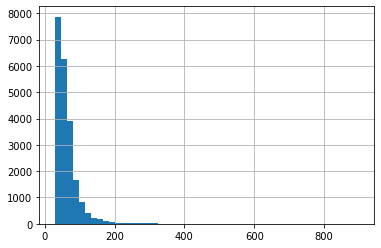

In [40]:
data['total_area'].hist(bins=50)
plt.show()

count    21715.000000
mean        61.883715
std         36.444843
min         28.000000
25%         40.000000
50%         54.000000
75%         71.600000
max        900.000000
Name: total_area, dtype: float64


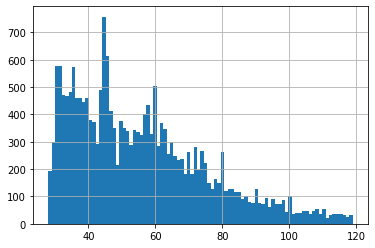

In [41]:
total_area_borders = make_hist_by_serie(data['total_area'])

Больше всего квартир находятся в районе от 30 до 65 кв.м. Выбросы свыше 300 кв.м. обусловлены либо большими планировками либо отдельными частными домами.

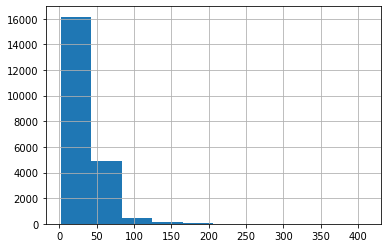

In [42]:
data['living_area'].hist(bins=10)
plt.show()

count    21715.000000
mean        35.014355
std         22.848809
min          2.000000
25%         18.870000
50%         30.400000
75%         43.000000
max        409.700000
Name: living_area, dtype: float64


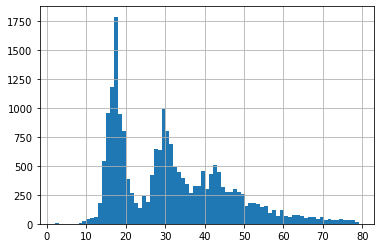

In [43]:
living_area_borders = make_hist_by_serie(data['living_area'])

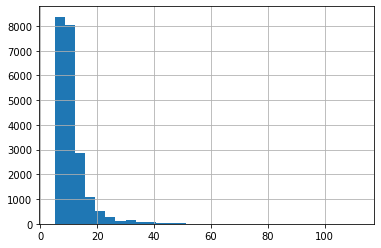

In [44]:
data['kitchen_area'].hist(bins=30)
plt.show()

count    21715.000000
mean        10.952898
std          6.182576
min          5.000000
25%          7.500000
50%          9.650000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


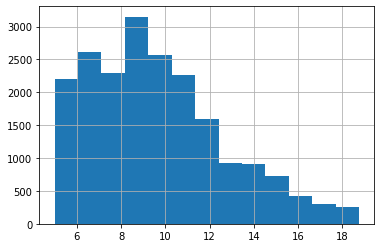

In [45]:
living_area_borders = make_hist_by_serie(data['kitchen_area'])

Кухни,где площадь от 8-10 кв.м пользуются большим спросом


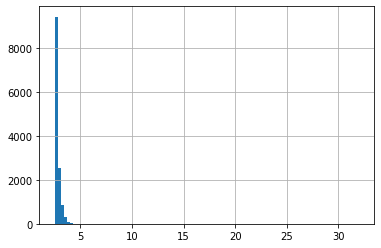

In [46]:
data['ceiling_height'].hist(bins=100)
plt.show()

count    13366.000000
mean         2.769449
std          0.896585
min          2.500000
25%          2.550000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64


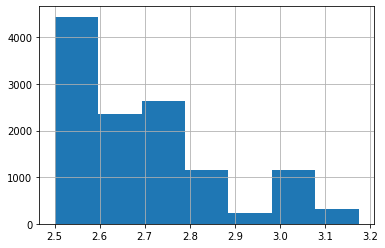

In [47]:
ceiling_height_borders = make_hist_by_serie(data['ceiling_height'])

Большинсво квартир имеют высоту от 2.5 до 2.75 м.

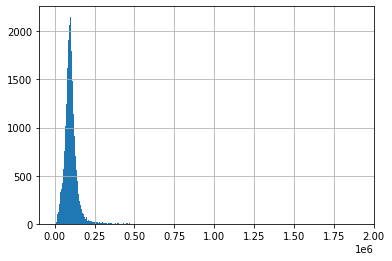

In [48]:
data['price_per_metre'].hist(bins=300)
plt.show()

count    2.171500e+04
mean     1.007377e+05
std      5.121525e+04
min      1.118300e+02
25%      7.766990e+04
50%      9.578544e+04
75%      1.150000e+05
max      1.907500e+06
Name: price_per_metre, dtype: float64


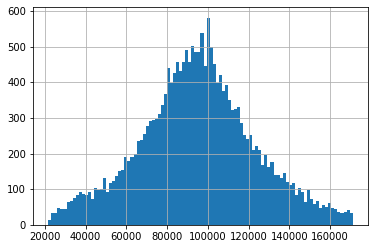

In [49]:
price_per_metre_borders = make_hist_by_serie(data['price_per_metre'])

Больше всего квартир находятся в районе от 60 до 130 тыс. рублей за кв.м.

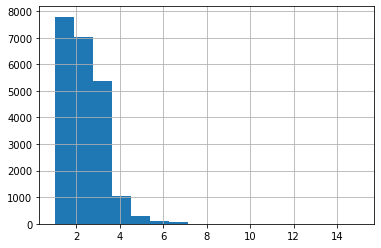

In [50]:
data['rooms'].hist(bins=16)
plt.show()

count    21715.000000
mean         2.062031
std          1.052579
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: rooms, dtype: float64


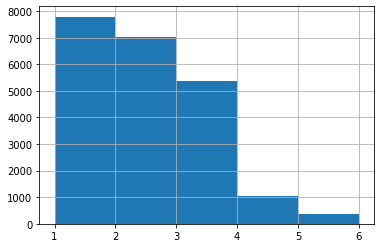

In [51]:
rooms_borders = make_hist_by_serie(data['rooms'])

Большее количество покупок однокомнатных, двухкомнатных и трёхкомнатных квартир

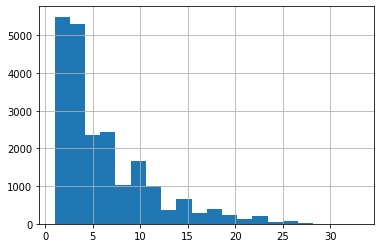

In [52]:
data['floor'].hist(bins=20)
plt.show()

count    21715.000000
mean         6.029841
std          4.921118
min          1.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


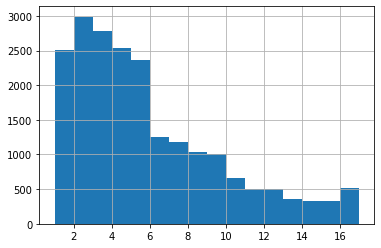

In [53]:
floor_borders = make_hist_by_serie(data['floor'])

Квартиры в основном находятся на 3 и 4 этажах

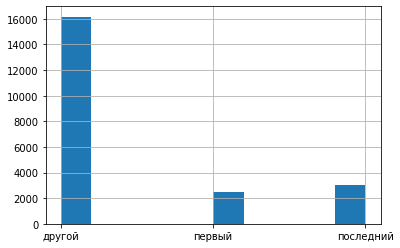

In [54]:
data['floor_category'].hist(bins=10)
plt.show()

Чаще всего люди покупают квартиры между 1 и последнем этажом

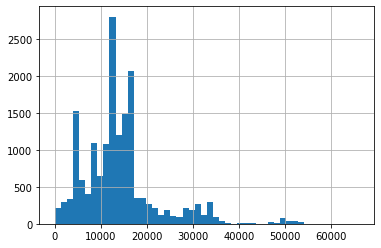

In [55]:
(data['nearest']*1000).hist(bins=50)
plt.show()

count    16917.000000
mean     14105.574274
std       8498.485268
min          0.000000
25%       9000.000000
50%      13000.000000
75%      16000.000000
max      66000.000000
Name: nearest, dtype: float64


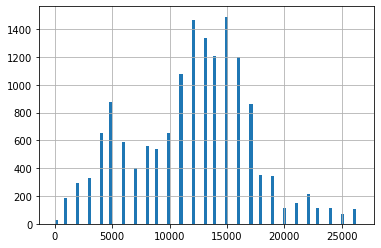

In [56]:
nearest_borders = make_hist_by_serie(data['nearest']*1000)

Самые большие значения по этому столбцу - 15000м(15км)

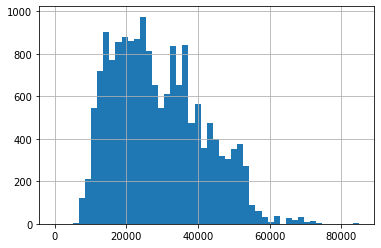

In [57]:
data['airports_nearest'].hist(bins=50)
plt.show()

count    16896.000000
mean     28998.391809
std      12533.375920
min          0.000000
25%      18794.750000
50%      27006.000000
75%      37364.000000
max      84869.000000
Name: airports_nearest, dtype: float64


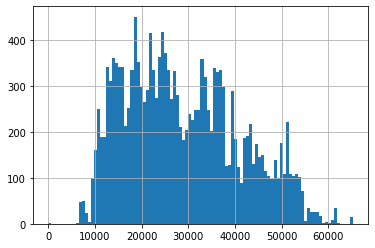

In [58]:
airports_nearest_borders = make_hist_by_serie(data['airports_nearest'])

Самые большие значения в диапазоне от 10К-20К метров

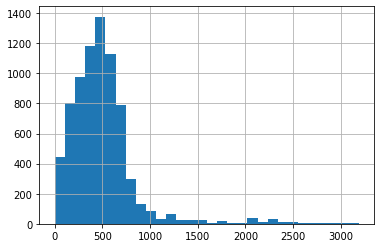

In [59]:
data['parks_nearest'].hist(bins=30)
plt.show()

count    7535.000000
mean      493.339217
std       347.875309
min         1.000000
25%       288.000000
50%       455.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64


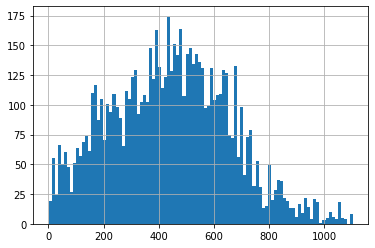

In [60]:
parks_nearest_borders = make_hist_by_serie(data['parks_nearest'])

Больше всего значений в расстоянии до парка от 400 до 600 метров

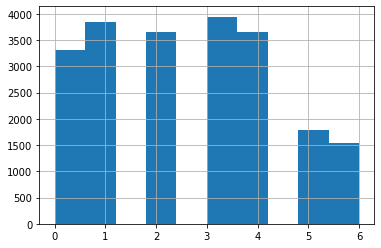

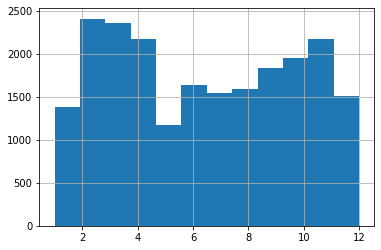

In [61]:
data['weekday'].hist(bins=10)
plt.show()
data['month'].hist(bins=12)
plt.show()

Больше всего публикаций в среду, а по месяцам - с февраля по апрель.

- Избавимся от выбросов по значимым для нас факторам: площадь, цена, число комнат, высота потолков

In [62]:
print('Количество значений до удаления выбросов:', data.shape[0])

good_by_area_data = data.query(
    '@total_area_borders[0] <= total_area <=  @total_area_borders[1]')
print('Количество значений хороших по общей площади:', good_data.shape[0])

good_by_price_per_metre_data = data.query(
    '@price_per_metre_borders[0] <= price_per_metre <=  @price_per_metre_borders[1]')
print('Количество значений хороших по цене за кв.м.:', good_by_price_per_metre_data.shape[0])

good_by_rooms_data = data.query(
    '@rooms_borders[0] <= rooms <=  @rooms_borders[1]')
print('Количество значений хороших по поличеству комнат:', good_by_rooms_data.shape[0])

good_by_ceiling_height_data = data.query(
    '@ceiling_height_borders[0] <= ceiling_height <=  @ceiling_height_borders[1]')
print('Количество значений хороших по высоте потолков:', good_by_ceiling_height_data.shape[0])

Количество значений до удаления выбросов: 21715
Количество значений хороших по общей площади: 21715
Количество значений хороших по цене за кв.м.: 20647
Количество значений хороших по поличеству комнат: 21636
Количество значений хороших по высоте потолков: 12308


- Проведем поочередный отсев выбросов и создадим финальную выборку.

In [63]:
old_new_len_data = data.shape[0]
data = (data
        .query('@total_area_borders[0] <= total_area <=  @total_area_borders[1]')
        .query('@rooms_borders[0] <= rooms <=  @rooms_borders[1]')
            )
print('Количество значений до обработки:',old_new_len_data)

print('Количество значений после обработки:',data.shape[0])
print('Процент удаленных данных:', '{:.2%}'.format(
    (old_new_len_data - data.shape[0])/old_new_len_data))

Количество значений до обработки: 21715
Количество значений после обработки: 20612
Процент удаленных данных: 5.08%


#### Время продажи квартиры

Изучим общие данные по времени продажи квартиры и построем гистограмму.

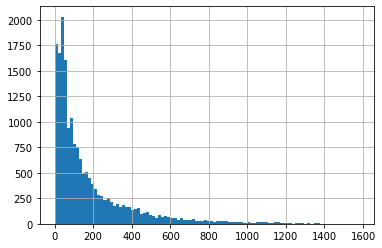

In [64]:
data['days_exposition'].hist(bins=100)
plt.show()

count    17977.000000
mean       177.402347
std        215.003148
min          1.000000
25%         45.000000
50%         94.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64


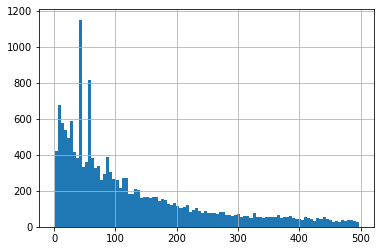

In [65]:
days_exposition_borders = make_hist_by_serie(data['days_exposition'])

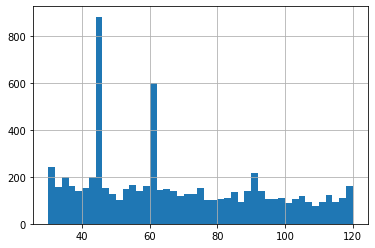

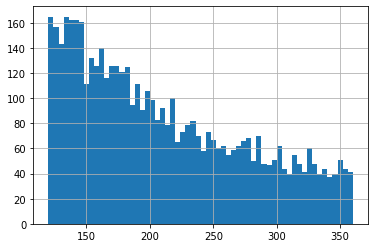

In [66]:
data['days_exposition'].hist(bins=45, range=(30,120))
plt.show()
data['days_exposition'].hist(bins=60, range=(120,360))
plt.show()

Ответы на вопросы:

1. Среднее значение продажи - 177 дней; медианное - 94 дня.
2. Обычно квартира продается за 30-120 дней, продажи квартир могут затянуться до 180-360 дней.
3. Быстрые продажи проходят до 7 дней. Необычно долгие продажи те, которые длятся больше года (360 дней).



? Какие факторы больше всего влияют на общую (полную) стоимость объекта? (общей площади, жилой площади,площади кухни,количества комнат,этажа, на котором расположена квартира (первый, последний, другой),даты размещения (день недели, месяц, год).


Составим корреляционные зависимости.

In [67]:
prise_area_rooms_center = data.loc[:,['price_per_metre', 'total_area', 'rooms', 'living_area', 'kitchen_area']]
prise_area_rooms_center.head()

prise_area_rooms_center.corr()

,price_per_metre,total_area,rooms,living_area,kitchen_area
price_per_metre,1.000000,0.134343,-0.077185,0.039385,0.304667
total_area,0.134343,1.000000,0.825086,0.917000,0.517648
rooms,-0.077185,0.825086,1.000000,0.895834,0.169022
living_area,0.039385,0.917000,0.895834,1.000000,0.244241
kitchen_area,0.304667,0.517648,0.169022,0.244241,1.000000


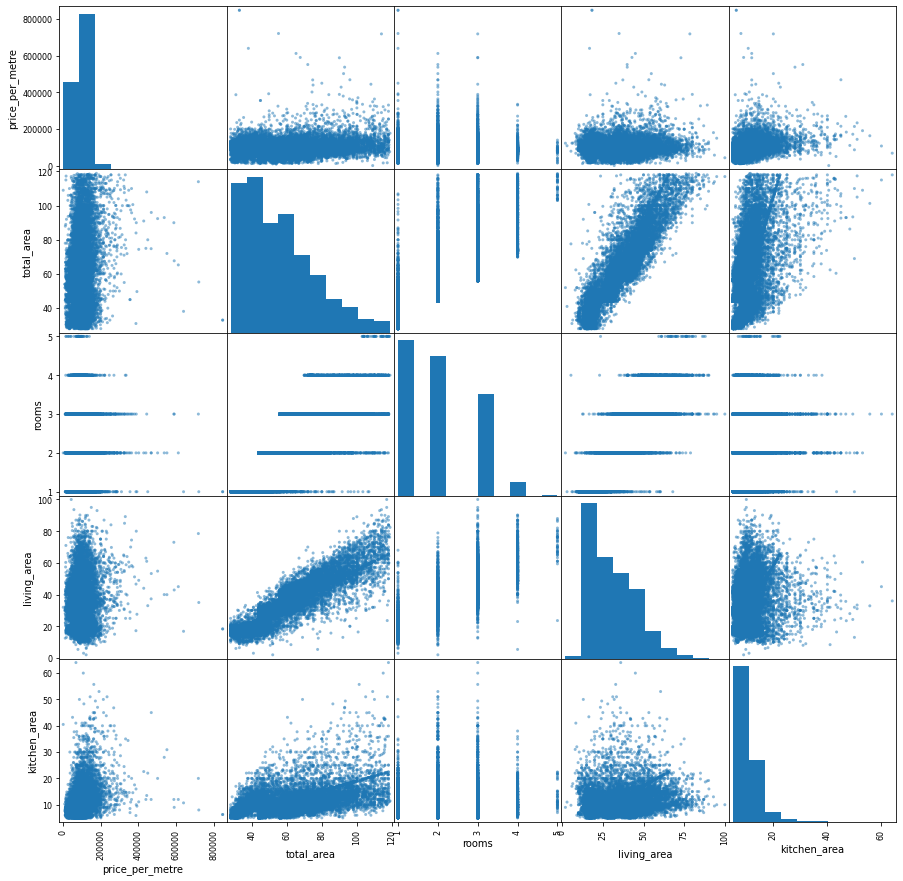

In [68]:
pd.plotting.scatter_matrix(prise_area_rooms_center, figsize=(15, 15))
plt.show()

Что мы видим:

1. Цена имеет слабую зависимость от площади. Большинство квартир продаются в районе от 60 тыс. до 140 тыс за кв. м. с площадью от 28 кв.м. до 80 кв.м.
2. Количество комнат отрицательно влияет на стоимость, но не сильно. Самые распространенные квартиры имеют от 1 до 3 комнат.
3. При покупке квартиры, люди чаще обращают внимание на площадь кухни,а не жилой площади.

- Посмотрим на этажи:

Построим гистограммы для каждой категории и выделим укрупненный диапозон с ценой.

count      2433.000000
mean      81560.300645
std       33348.013168
min        9615.380000
25%       62073.670000
50%       81451.610000
75%       98338.870000
max      440000.000000
Name: price_per_metre, dtype: float64


(9615.38, 152736.66999999998)

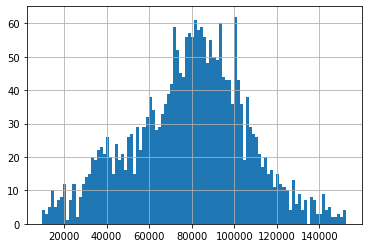

In [69]:
# print(data[data['floor_category'] == 'первый']['price_per_metre'].describe())

# data[data['floor_category'] == 'первый']['price_per_metre'].hist(bins=50)
make_hist_by_serie(data[data['floor_category'] == 'первый']['price_per_metre'])

Квартиры на первом этаже не популярны. Больше всего квартир продали за 60 тыс. за кв.м. и после 110 тыс. за кв.м. начинается спад по продажам этих квартир.

count      2806.000000
mean      89139.142220
std       38169.719844
min         111.830000
25%       66081.350000
50%       88133.640000
75%      107446.325000
max      502425.020000
Name: price_per_metre, dtype: float64


(4033.8874999999825, 169493.7875)

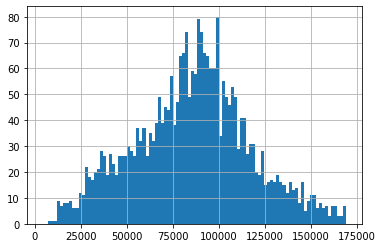

In [70]:
# print(data[data['floor_category'] == 'последний']['price_per_metre'].describe())
# data[data['floor_category'] == 'последний']['price_per_metre'].hist(bins=50)
make_hist_by_serie(data[data['floor_category'] == 'последний']['price_per_metre'])

Квартир на последнем этаже также много продали за цену в диапазоне 75- 100 тыс. за кв. м . и спад начинается после 100 тыс. за кв.м. Квартиры на последнем этаже дороже, чем на первом.

count     15373.000000
mean     101296.854682
std       38093.583658
min       10897.440000
25%       81212.120000
50%       98144.100000
75%      116407.980000
max      848484.850000
Name: price_per_metre, dtype: float64


(28418.329999999994, 169201.77)

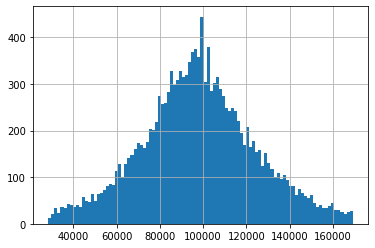

In [71]:
# print(data[data['floor_category'] == 'другой']['price_per_metre'].describe())
# data[data['floor_category'] == 'другой']['price_per_metre'].hist(bins=100)

make_hist_by_serie(data[data['floor_category'] == 'другой']['price_per_metre'])

Основные продажи квартир на остальных этажах проходят в районе от 80 тыс. за кв.м. до 100 тыс. за кв.м. и идет на спад. Мы видим, что другие этажи стоят дороже, чем первые. Их стоимость в целом выше от квартир на последнем этаже, но нет так сильно.Люди платят больше за квартиры не на первом и не на последнем этаже.

- дата размещения: день недели, месяц и год.

In [72]:
prise_weekday_month_year = data.loc[:,['price_per_metre', 'weekday', 'month', 'year']]
prise_weekday_month_year.head()

prise_weekday_month_year.corr()

,price_per_metre,weekday,month,year
price_per_metre,1.000000,-0.011337,-0.006225,0.042889
weekday,-0.011337,1.000000,0.014184,-0.009019
month,-0.006225,0.014184,1.000000,-0.271024
year,0.042889,-0.009019,-0.271024,1.000000


Матрица корреляции имеет слабые зависимости. Пройдёмся по столбцам:

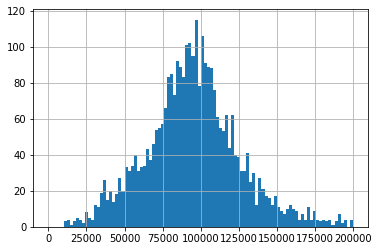

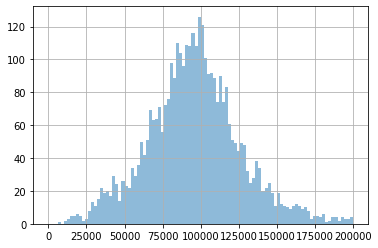

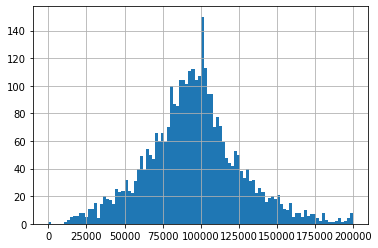

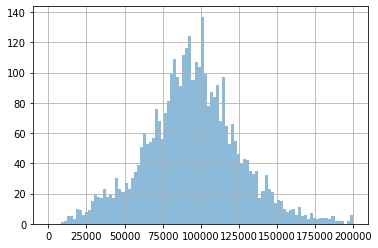

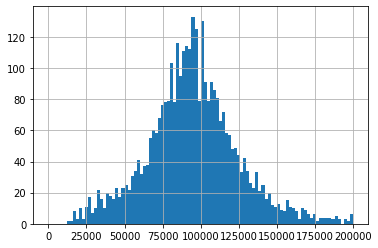

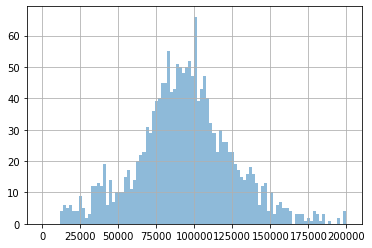

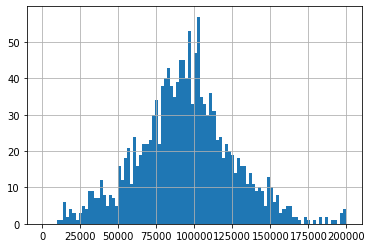

In [73]:
#print(prise_weekday_month_year[prise_weekday_month_year['weekday'] == 0]['last_price'].describe())
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 0]['price_per_metre'].hist(bins=100, range=(0,200000))
plt.show()
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 1]['price_per_metre'].hist(bins=100, range=(0,200000), alpha=0.5)
plt.show()
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 2]['price_per_metre'].hist(bins=100, range=(0,200000))
plt.show()
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 3]['price_per_metre'].hist(bins=100, range=(0,200000), alpha=0.5)
plt.show()
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 4]['price_per_metre'].hist(bins=100, range=(0,200000))
plt.show()
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 5]['price_per_metre'].hist(bins=100, range=(0,200000), alpha=0.5)
plt.show()
prise_weekday_month_year[prise_weekday_month_year['weekday'] == 6]['price_per_metre'].hist(bins=100, range=(0,200000))
plt.show()

Стомость квартиры не зависит от дня продажи,меняется только количество проданных квартир. Больше всего квартир продают за будние дни, когда у риелторов и агенств основной режим работы.

Изучим гистограммы по столбцу месяцев.

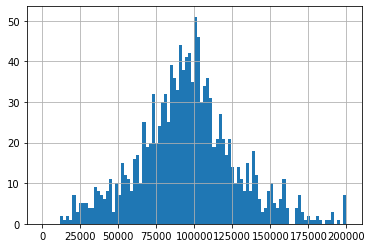

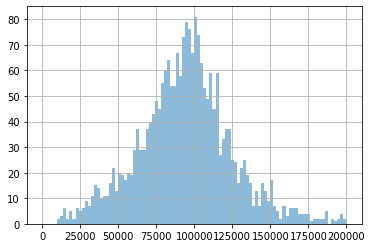

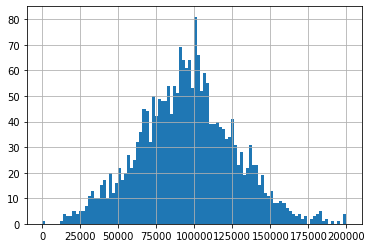

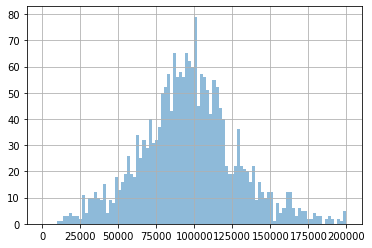

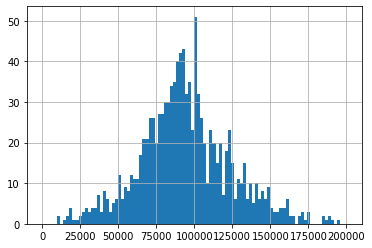

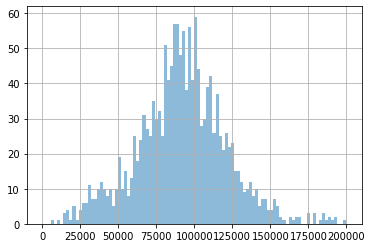

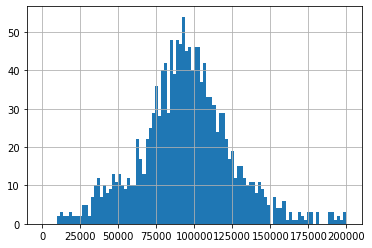

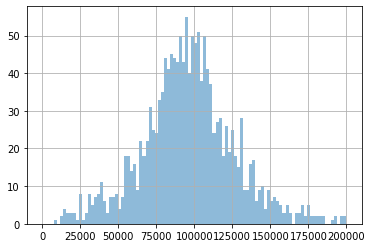

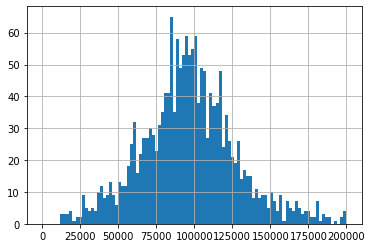

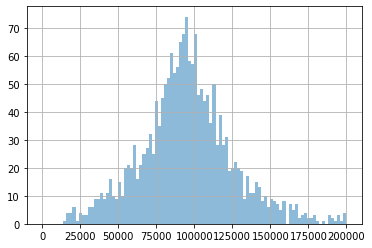

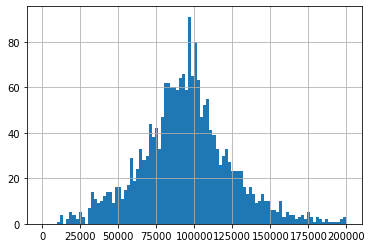

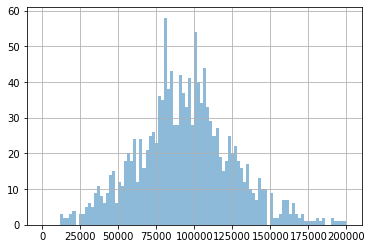

In [74]:
prise_weekday_month_year[prise_weekday_month_year['month'] == 1]['price_per_metre'].hist(bins=100, range=(0,200000))
plt.show()
prise_weekday_month_year[prise_weekday_month_year['month'] == 2]['price_per_metre'].hist(bins=100, range=(0,200000), alpha=0.5)
plt.show()
prise_weekday_month_year[prise_weekday_month_year['month'] == 3]['price_per_metre'].hist(bins=100, range=(0,200000))
plt.show()
prise_weekday_month_year[prise_weekday_month_year['month'] == 4]['price_per_metre'].hist(bins=100, range=(0,200000), alpha=0.5)
plt.show()
prise_weekday_month_year[prise_weekday_month_year['month'] == 5]['price_per_metre'].hist(bins=100, range=(0,200000))
plt.show()
prise_weekday_month_year[prise_weekday_month_year['month'] == 6]['price_per_metre'].hist(bins=100, range=(0,200000), alpha=0.5)
plt.show()
prise_weekday_month_year[prise_weekday_month_year['month'] == 7]['price_per_metre'].hist(bins=100, range=(0,200000))
plt.show()
prise_weekday_month_year[prise_weekday_month_year['month'] == 8]['price_per_metre'].hist(bins=100, range=(0,200000), alpha=0.5)
plt.show()
prise_weekday_month_year[prise_weekday_month_year['month'] == 9]['price_per_metre'].hist(bins=100, range=(0,200000))
plt.show()
prise_weekday_month_year[prise_weekday_month_year['month'] == 10]['price_per_metre'].hist(bins=100, range=(0,200000), alpha=0.5)
plt.show()
prise_weekday_month_year[prise_weekday_month_year['month'] == 11]['price_per_metre'].hist(bins=100, range=(0,200000))
plt.show()
prise_weekday_month_year[prise_weekday_month_year['month'] == 12]['price_per_metre'].hist(bins=100, range=(0,200000), alpha=0.5)
plt.show()

Зависимость есть

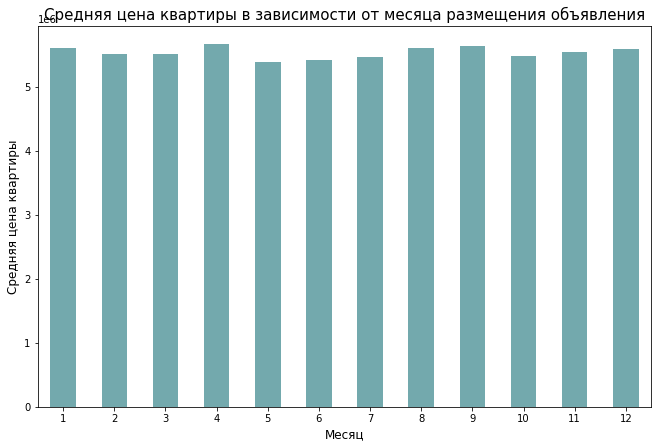

In [75]:
# код ревьюера

data.groupby('month')['last_price'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от месяца размещения объявления', size=15)
plt.xlabel('Месяц', size=12)
plt.ylabel('Средняя цена квартиры', size=12)

plt.show()

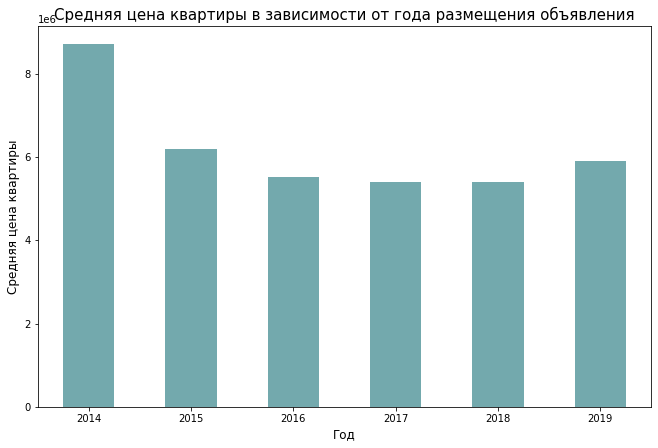

In [76]:
data.groupby('year')['last_price'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от года размещения объявления', size=15)
plt.xlabel('Год', size=12)
plt.ylabel('Средняя цена квартиры', size=12)

plt.show()

Как мы видим,в 2014 квартиры стоили дороже - это объясняется кризисом 2014 года. Затем в 2019 году стоимсть снова начала расти и по информации,которую я нашла(https://www.mk.ru/economics/2019/01/14/nazvany-7-prichin-podorozhaniya-zhilya-v-2019-godu.html) это связано с инфляцией.

#### Выберите 10 населённых пунктов с наибольшим числом объявлений.

1. Посчитать среднюю цену квадратного метра в этих населённых пунктах.
2. Выделить населённые пункты с самой высокой и низкой стоимостью жилья

In [77]:
data['short_locality_name'] = data['locality_name'].apply(make_short_name)
top_10_locality_name = data['short_locality_name'].value_counts()[:10]
print(top_10_locality_name)

top_10_locality_name = top_10_locality_name.index
top_10_locality_name

Санкт-Петербург    13657
Мурино               508
Кудрово              427
Шушары               413
Всеволожск           367
Пушкин               318
Парголово            318
Колпино              303
Гатчина              254
Выборг               194
Name: short_locality_name, dtype: int64


Index(['Санкт-Петербург', 'Мурино', 'Кудрово', 'Шушары', 'Всеволожск',
       'Пушкин', 'Парголово', 'Колпино', 'Гатчина', 'Выборг'],
      dtype='object')

In [78]:
top_10_pivot_table_mean = (data
                           .query('short_locality_name in @top_10_locality_name')
                           .pivot_table(index='short_locality_name', values='price_per_metre', aggfunc='mean')
                           .sort_values('price_per_metre', ascending=False))
top_10_pivot_table_mean

,price_per_metre
short_locality_name,
Санкт-Петербург,111399.115924
Пушкин,103353.478145
Кудрово,94617.913349
Парголово,90597.161478
Мурино,84781.040945
Шушары,77969.285714
Колпино,75924.458383
Гатчина,69862.702480
Всеволожск,69129.192125


In [79]:
top_10_pivot_table_min_max = (data
                              .query('short_locality_name in @top_10_locality_name')
                              .pivot_table(index='short_locality_name', values='price_per_metre', aggfunc=['min','max'])).reset_index()
top_10_pivot_table_min_max

,short_locality_name,min,max
,,price_per_metre,price_per_metre
0,Всеволожск,31400.00,640422.35
1,Выборг,18750.00,94805.19
2,Гатчина,10897.44,146315.79
3,Колпино,47957.37,125000.00
4,Кудрово,54160.35,160401.00
5,Мурино,50000.00,138580.25
6,Парголово,48405.47,138522.43
7,Пушкин,59836.07,256521.74
8,Санкт-Петербург,111.83,848484.85


Как и ожидалось - в Санкт-Петербурге самая высокая цена за квадратный метр, как и среднее значение.
Самая низкая цена за квадратный метр - в Гатчине

Центральной зоной можно считать квартиры в радиусе до 3 км от цента Санкт-Петербурга.Плавный пик в районе 4-7 км объясняется инфраструктурой. Локальный пик в 27 км обусловлен дороговизной квартир в Петергофе.

### Общий вывод

Проделана работа:
- Были определены аномалии и построена стратегия замены пропусков.
- Пропуски были заполнены максимально возможными способами, чтобы каждое значение могло влиять на гипотезы.
- Приведены типы данных для уменьшения используемой памяти и отображаемого вида в таблице.
- Созданы дополнительные столбцы для улучшения анализа данных.
- Даны ответы на заданные вопросы.


1. Основным ориентиром для определения стоимости квартиры - это стоимость квадратного метра.
2. Даты продаж позволят определить, в какой момент лучше продвигать рекламную компанию по продаже домов. В какие месяцы или дни недели. Количество продаж по годам имеет естественную зависимость от количество жителей города.
3. Этаж квартиры. В большинстве случаев люди редко берут квартиры на первом этаже из-за их небезопасности, а квартиры на последним - из-за возможных проблем с крышей. Соотвественно самыми дорогими считаются комфортные квартиры между первым и последним этажом.
5. Пригороды к Санкт-Петербургу имеют тенденцию к снижению цен за квартиру из-за удалённости от центра.
6. Центр города в целом имеет хорошие квартиры и планировки и соотвественно одни из самых больших по стоимости квартир в районе.